In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [7]:
dados = pd.read_csv('PS4_GamesSales.csv', encoding ='latin-1')

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [9]:
# Dimensão 
dados.shape

(1034, 9)

In [11]:
# Nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

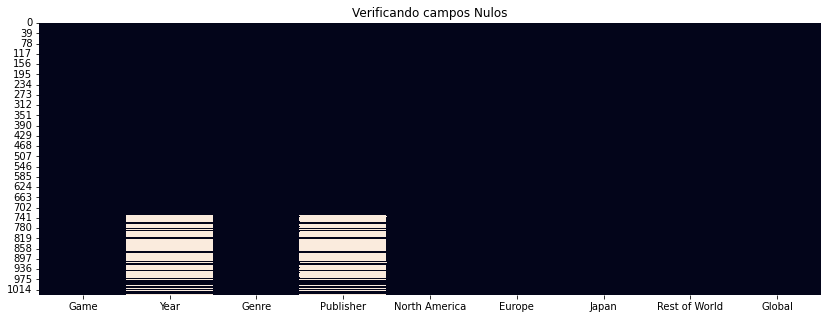

In [22]:
# Nulos Gráficos 
plt.figure( figsize=(14, 5) )
plt.title('Verificando campos Nulos')
sns.heatmap( dados.isnull(), cbar=False);

In [25]:
# Retirando valores nulos
dados.dropna( inplace= True) # atualiza a base

In [26]:
dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [27]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


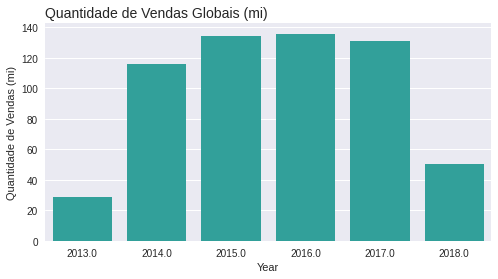

In [252]:
# Analisando valores de vendaas durante os anos 
#Tamanho do grafico
plt.figure(figsize=(8,4))
# Título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=(14))
#Gráfico
sns.barplot(data=dados, x='Year', y='Global', ci=None, color='#20B2AA', estimator =sum)
#Label
plt.ylabel('Quantidade de Vendas (mi)');

In [53]:
# Retirando dados que nao serão utilizados (anos(2019,2020))
dados = dados.loc[(dados['Year'] != 2019) & (dados['Year'] != 2020)]
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


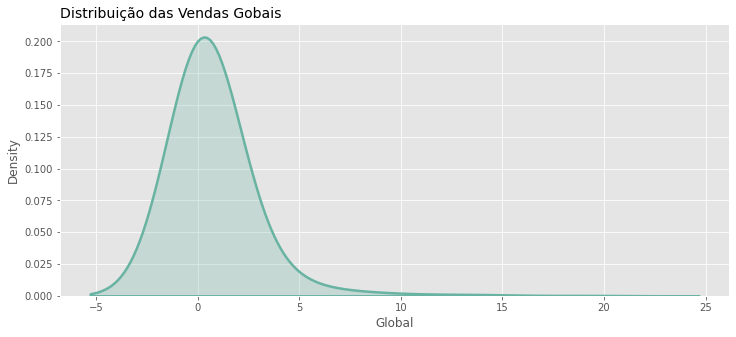

In [60]:
# Densidade de Vendas 

#Tamanho
plt.figure( figsize=(12,5) )

#Estilo
plt.style.use('ggplot')

plt.title('Distribuição das Vendas Gobais', loc='left', fontsize=14)
sns.kdeplot( dados['Global'], shade=True, bw=1, color='#69b3a2', linewidth=2.5);


In [106]:
analise = dados.groupby( by=['Year']).sum()

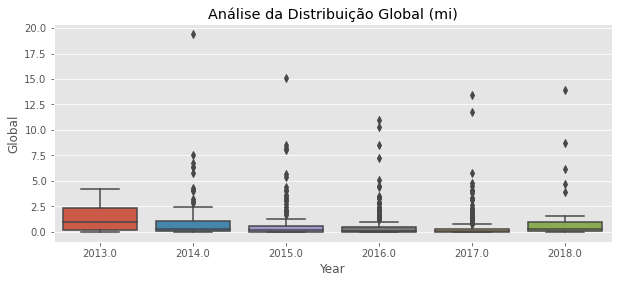

In [107]:
#

plt.figure(figsize=(10,4))
plt.title("Análise da Distribuição Global (mi)")
sns.boxplot(data=dados, x='Year', y='Global');

In [72]:
dados.loc[dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [74]:
dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [145]:
analise = dados.groupby( by=['Year'] ).sum().reset_index()

# Formula de Representação do Continente  com a Global
America = [ America / Total *100 
  for America, Total in zip
    (analise['North America'] , analise['Global'])]

Europa = [ Europa / Total *100 
  for Europa, Total in zip
    (analise['Europe'] , analise['Global'])]

Japao = [ Japao / Total *100 
  for Japao, Total in zip
    (analise['Japan'] , analise['Global'])]    

Mundo = [ Mundo / Total *100 
  for Mundo, Total in zip
    (analise['Rest of World'] , analise['Global'])]    


America, Europa, Japão, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [114]:
analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


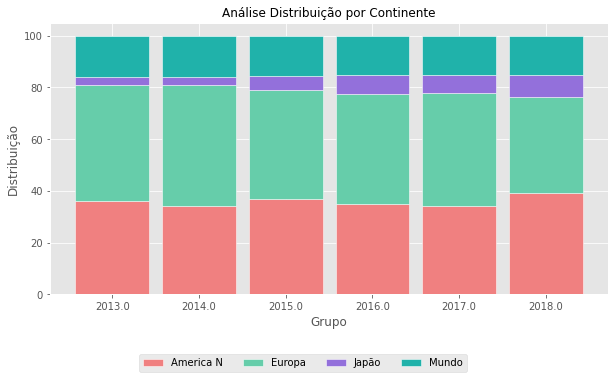

In [192]:
# Gráfico de Barras Empilhadas 

plt.figure(figsize = (10,5))

# Largura da Barra 
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0,1,2,3,4,5]

# Título
plt.title('Análise Distribuição por Continente', fontsize=(12));

# Plot da America
plt.bar( grupos, America, width=largura_barra, color='#F08080', edgecolor='white' )

# Plot da Europa
plt.bar( grupos, Europa, bottom=America, width=largura_barra, color='#66CDAA', edgecolor='white' )

# Plot do Japao
plt.bar( grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=largura_barra, color='#9370DB', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=largura_barra, color='#20B2AA', edgecolor='white' )


# Labels
plt.xticks( grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição');

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.2), ncol=4);


In [196]:
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [201]:
# conversão caracteres por numericos 
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

dados['Produtor'] = funcao_label.fit_transform(dados['Publisher'])
dados['Genero'] = funcao_label.fit_transform(dados['Genre'])
dados['Jogo'] = funcao_label.fit_transform(dados['Game'])

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [215]:
paleta_cores = sns.color_palette('PiYG_r',20)
paleta_cores

[(0.22306805074971164, 0.4770472895040369, 0.11280276816608997),
 (0.29319492502883504, 0.5619377162629757, 0.12756632064590545),
 (0.38269896193771635, 0.6403690888119955, 0.18108419838523648),
 (0.474971164936563, 0.7178777393310266, 0.24013840830449834),
 (0.5769319492502885, 0.7884659746251442, 0.3504036908881201),
 (0.690888119953864, 0.8624375240292196, 0.4883506343713958),
 (0.7816993464052289, 0.9084967320261439, 0.6222222222222225),
 (0.8665897731641679, 0.9454056132256825, 0.7587850826605155),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.9516339869281046, 0.9666282199154171, 0.9296424452133795),
 (0.9746251441753172, 0.9456362937331796, 0.9606305267204921),
 (0.9856978085351789, 0.9031910803537101, 0.9458669742406767),
 (0.9829296424452134, 0.8461361014994233, 0.9211072664359862),
 (0.9607843137254902, 0.7686274509803922, 0.8823529411764706),
 (0.9348712033833141, 0.6798154555940024, 0.8312187620146098),
 (0.8968858131487889, 0.5538638985005767, 0.7432525951557093),
 (0.8590542099192618, 0.42422145328719724, 0.6597462514417531),
 (0.8129181084198386, 0.2544405997693195, 0.5693194925028835),
 (0.7598615916955017, 0.09988465974625144, 0.4802768166089965),
 (0.6583621683967705, 0.05190311418685121, 0.40092272202998847)]

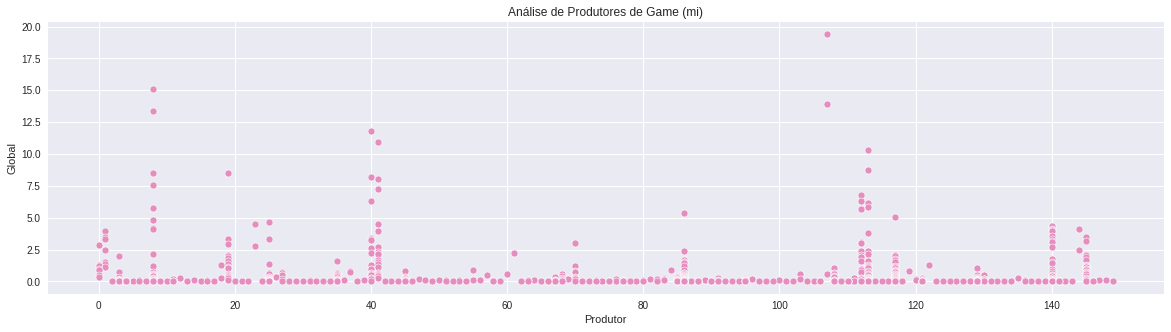

In [254]:
plt.figure(figsize=(20,5))
plt.title('Análise de Produtores de Game (mi)')
sns.scatterplot(data=dados, x='Produtor', y='Global', color=paleta_cores[15]);

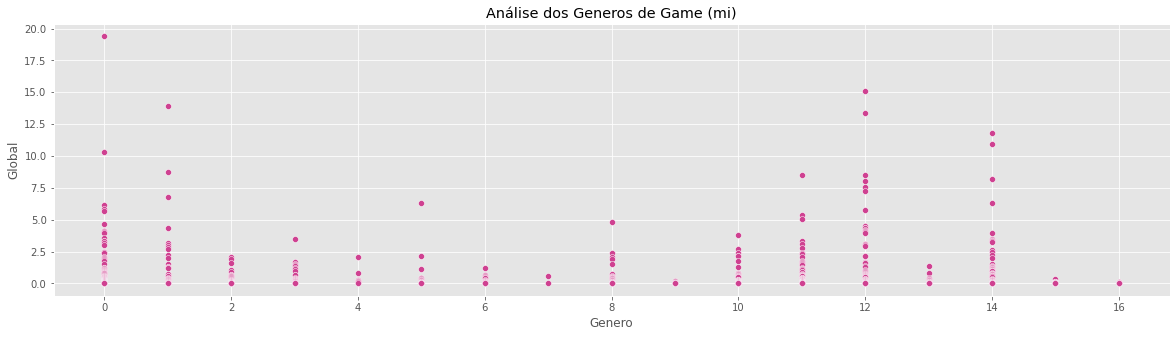

In [242]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Generos de Game (mi)')
sns.scatterplot(data=dados, x='Genero', y='Global', color=paleta_cores[17]);

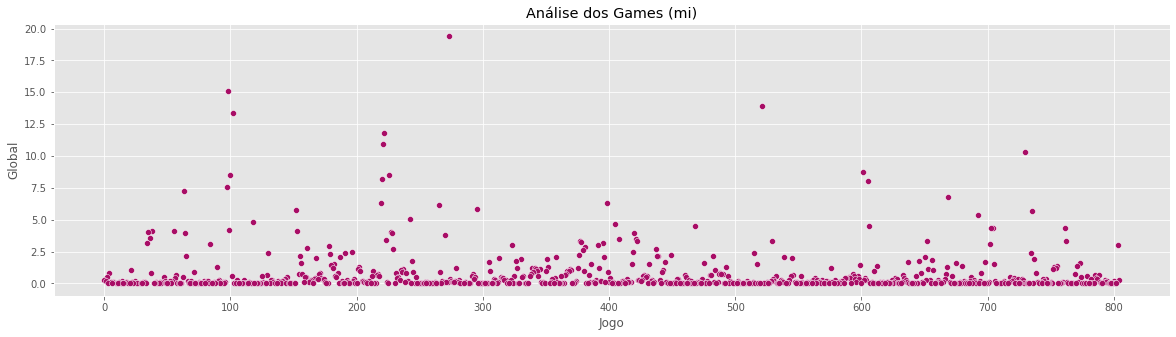

In [235]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=paleta_cores[19]);

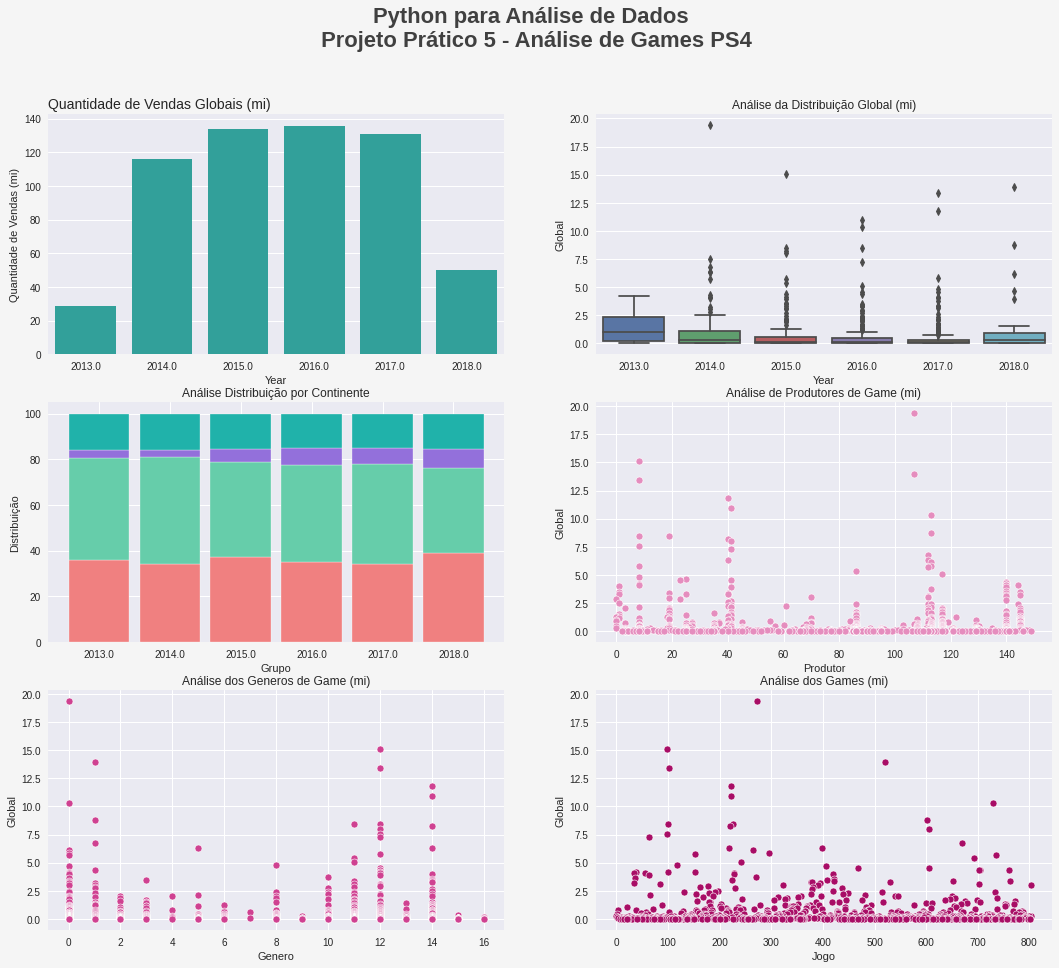

In [257]:
# Análise Geral

#Tamanho 
fig, ax = plt.subplots( figsize=(18,15))

# Cor do Fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor( cor_fundo)
fig.set_facecolor( cor_fundo)

# Estilo dos Gráficos
plt.style.use('seaborn')

# Título 
plt.suptitle('Python para Análise de Dados \n Projeto Prático 5 - Análise de Games PS4', fontsize = 22, color='#404040', fontweight=600)

# Parametros para o grid
linhas = 3
colunas = 2

# Acessando Gráfico 1 
plt.subplot( linhas, colunas,1)

# Título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=(14))
#Gráfico
sns.barplot(data=dados, x='Year', y='Global', ci=None, color='#20B2AA', estimator =sum)
#Label
plt.ylabel('Quantidade de Vendas (mi)');

# Acessando Gráfico 2
plt.subplot(linhas,colunas, 2)
plt.title("Análise da Distribuição Global (mi)")
sns.boxplot(data=dados, x='Year', y='Global');

# Acessando Gráfico 3
plt.subplot(linhas, colunas, 3)
# Largura da Barra 
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0,1,2,3,4,5]

# Título
plt.title('Análise Distribuição por Continente', fontsize=(12));

# Plot da America
plt.bar( grupos, America, width=largura_barra, color='#F08080', edgecolor='white' )

# Plot da Europa
plt.bar( grupos, Europa, bottom=America, width=largura_barra, color='#66CDAA', edgecolor='white' )

# Plot do Japao
plt.bar( grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=largura_barra, color='#9370DB', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=largura_barra, color='#20B2AA', edgecolor='white' )


# Labels
plt.xticks( grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição');

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.2), ncol=4);

# Acessando Gráfico 4 
plt.subplot(linhas,colunas,4)
plt.title('Análise de Produtores de Game (mi)')
sns.scatterplot(data=dados, x='Produtor', y='Global', color=paleta_cores[15]);

# Acessando Gráfico 5 
plt.subplot(linhas,colunas,5)
plt.title('Análise dos Generos de Game (mi)')
sns.scatterplot(data=dados, x='Genero', y='Global', color=paleta_cores[17]);

#Acessando Gráfico 6 
plt.subplot(linhas,colunas,6)
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=paleta_cores[19]);


